# Fit the DDM on individual data

In [1]:
import rlssm
import pandas as pd
import os

## Import the data

In [2]:
data = rlssm.load_example_dataset(hierarchical_levels = 1)

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,15,1,1,50,28,3,1,1,2.630658,1
1,15,1,2,52,44,3,1,2,2.718299,1
2,15,1,3,30,38,2,1,2,2.382882,1
3,15,1,4,64,45,4,2,1,2.167205,1
4,15,1,5,48,26,3,1,3,2.748257,0


## Initialize the model

In [3]:
model = rlssm.DDModel(hierarchical_levels = 1)

Using cached StanModel


## Fit

In [4]:
# sampling parameters
n_iter = 1000
n_chains = 2
n_thin = 1

In [5]:
model_fit = model.fit(
    data,
    thin = n_thin,
    iter = n_iter,
    chains = n_chains,
    pointwise_waic=False,
    verbose = False)

Fitting the model using the priors:
drift_priors {'mu': 1, 'sd': 5}
threshold_priors {'mu': 0, 'sd': 5}
ndt_priors {'mu': 0, 'sd': 5}


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0.0 of 1000 iterations ended with a divergence (0.0%)
0 of 1000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


### get Rhat

In [6]:
model_fit.rhat

,rhat,variable
0,1.000810,drift
1,1.006943,threshold
2,1.007549,ndt


### get wAIC

In [7]:
model_fit.waic

{'lppd': -249.31901167684737,
 'p_waic': 3.0587189056624244,
 'waic': 504.7554611650196,
 'waic_se': 34.26010966730786}

## Posteriors

In [8]:
model_fit.samples.describe()

,chain,draw,transf_drift,transf_threshold,transf_ndt
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.50000,249.500000,0.887978,2.066264,0.936474
std,0.50025,144.409501,0.077742,0.078720,0.016016
min,0.00000,0.000000,0.639946,1.866531,0.871589
25%,0.00000,124.750000,0.838996,2.012143,0.926123
50%,0.50000,249.500000,0.887060,2.060566,0.938202
75%,1.00000,374.250000,0.939397,2.117163,0.948530
max,1.00000,499.000000,1.172651,2.364307,0.971738


In [9]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

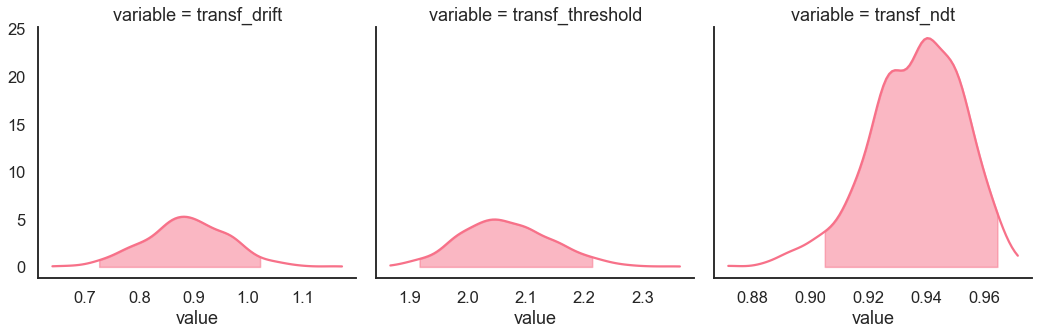

In [10]:
model_fit.plot_posteriors(height=5, show_intervals="HDI", alpha_intervals=.05);

## Posterior predictives

### Ungrouped

In [11]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         1.223334  2.259334  1.509334  1.212334  2.187334  2.319334   
2         1.305570  1.567570  1.483570  1.874570  1.748570  1.159570   
3         1.400020  1.402020  3.388020  1.057020  2.142020  1.223020   
4         4.672817  1.878817  1.780817  1.547817  2.339817  1.494817   
5         3.312260  2.279260  2.675260  1.332260  1.425260  2.339260   
...            ...       ...       ...       ...       ...       ...   
96        2.024093  1.262093  2.446093  4.031093  1.437093  1.193093   
97        1.300279  1.493279  1.214279  1.889279  1.611279  1.160279   
98        1.342920  1.468920  2.064920  1.563920  3.481920  1.511920   
99        1.473277  2.308277  1.750277  1.995277  1.345277  1.712277   
100       1.485624  1.479624  1.893624  2.016624  1.354624  2.434624   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      230  231  232  233   
sample                                            ...                           
1         1.228334  2.348334  1.991334  1.349334  ...      1.0  1.0  1.0  0.0   
2         1.312570  1.802570  1.703570  1.095570  ...      1.0  1.0  1.0  1.0   
3         2.474020  1.597020  1.396020  1.279020  ...      1.0  1.0  1.0  1.0   
4         1.835817  1.222817  2.578817  3.279817  ...      0.0  1.0  1.0  1.0   
5         1.814260  1.268260  1.372260  1.549260  ...      0.0  1.0  0.0  1.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        2.746093  1.450093  1.216093  2.919093  ...      1.0  1.0  1.0  1.0   
97        1.265279  1.881279  3.004279  2.891279  ...      1.0  1.0  0.0  1.0   
98        1.863920  1.289920  1.685920  1.471920  ...      1.0  1.0  1.0  1.0   
99        1.291277  1.392277  1.486277  1.976277  ...      1.0  1.0  1.0  1.0   
100       1.665624  2.441624  1.143624  1.129624  ...      1.0  1.0  0.0  1.0   

variable                                
trial     234  235  236  237  238  239  
sample                                  
1         1.0  1.0  0.0  1.0  1.0  0.0  
2         1.0  1.0  1.0  1.0  1.0  1.0  
3         1.0  1.0  0.0  1.0  0.0  1.0  
4         1.0  1.0  1.0  1.0  1.0  1.0  
5         1.0  1.0  1.0  1.0  1.0  1.0  
...       ...  ...  ...  ...  ...  ...  
96        0.0  1.0  1.0  0.0  0.0  1.0  
97        1.0  0.0  1.0  1.0  1.0  1.0  
98        1.0  1.0  1.0  1.0  0.0  1.0  
99        1.0  0.0  1.0  1.0  1.0  1.0  
100       1.0  1.0  1.0  1.0  1.0  1.0  

[100 rows x 478 columns]

In [12]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_low,quant_30_rt_low,quant_50_rt_low,quant_70_rt_low,quant_90_rt_low,quant_10_rt_up,quant_30_rt_up,quant_50_rt_up,quant_70_rt_up,quant_90_rt_up
sample,,,,,,,,,,,,,
1,0.878661,1.892451,2.078444,1.378734,1.538534,1.742334,2.037534,3.194934,1.212934,1.432634,1.656334,2.048934,2.963734
2,0.832636,1.769654,3.328429,1.184570,1.293470,1.441070,1.742370,2.202970,1.185370,1.381770,1.575570,1.923370,2.626970
3,0.924686,1.782321,1.752938,1.219020,1.453120,1.737520,1.887220,2.282020,1.230020,1.360020,1.584020,1.929020,2.615020
4,0.803347,1.767152,1.387015,1.225617,1.505617,1.725817,1.867217,2.265217,1.175917,1.353117,1.589317,1.994917,2.578117
5,0.895397,1.745301,2.373022,1.250060,1.413660,1.624260,1.853460,2.186860,1.179860,1.352760,1.582260,1.840360,2.588060
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.849372,1.825122,2.236298,1.277593,1.400593,1.548593,1.712593,2.730093,1.198093,1.389893,1.613093,2.038493,2.657093
97,0.874477,1.747479,1.793196,1.177179,1.235679,1.505779,1.718079,2.450379,1.171479,1.301479,1.504279,1.795079,2.846879
98,0.836820,1.865740,1.573733,1.221320,1.324320,1.529920,1.825520,2.247520,1.200220,1.433020,1.740920,2.032520,2.920520


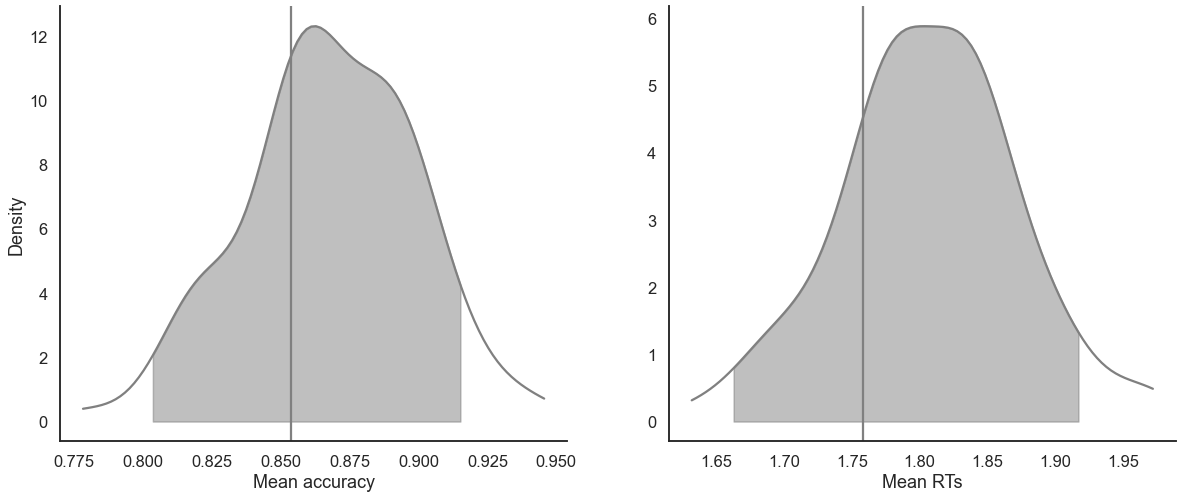

In [13]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

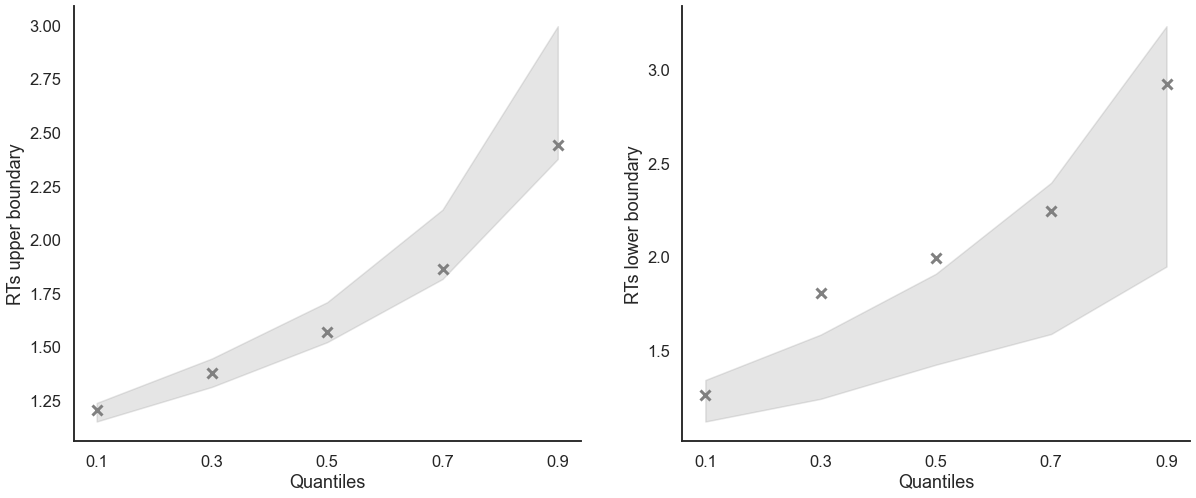

In [14]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

### Grouped

In [15]:
import numpy as np

In [16]:
# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [17]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1           AB          1                0.85  2.110784  1.247609   
                        2                0.85  1.624170  0.995058   
                        3                0.95  1.735570  1.643538   
                        4                0.75  1.557317  1.365500   
                        5                0.85  1.756110  1.313400   
...                                       ...       ...       ...   
3           CD          96               0.75  1.501643  0.760884   
                        97               1.00  1.679479  1.992939   
                        98               1.00  1.809320  2.061042   
                        99               0.95  1.526577  1.452011   
                        100              0.85  1.690874  2.286446   

                                quant_30_rt_low  quant_30_rt_up  \
block_label choice_pair sample                                    
1           AB          1              1.394134        1.324534   
                        2              1.831370        1.357170   
                        3              1.350020        1.374820   
                        4              1.221417        1.320417   
                        5              1.313460        1.244660   
...                                         ...             ...   
3           CD          96             1.369893        1.277693   
                        97                  NaN        1.343079   
                        98                  NaN        1.290220   
                        99             1.913277        1.293877   
                        100            1.749624        1.329624   

                                quant_50_rt_low  quant_50_rt_up  \
block_label choice_pair sample                                    
1           AB          1              1.427334        1.898334   
                        2              2.268570        1.439570   
                        3              1.350020        1.546020   
                        4              1.239817        1.503817   
                        5              1.338260        1.565260   
...                                         ...             ...   
3           CD          96             1.553093        1.382093   
                        97                  NaN        1.527279   
                        98                  NaN        1.469920   
                        99             1.913277        1.353277   
                        100            1.943624        1.404624   

                                quant_70_rt_low  quant_70_rt_up  
block_label choice_pair sample                                   
1           AB          1              1.492934        2.750934  
                        2              2.271770        1.612570  
                        3              1.350020        1.817820  
                        4              1.509417        1.694217  
                        5              1.588660        2.090260  
...                                         ...             ...  
3           CD          96             1.657093        1.625293  
                        97                  NaN        1.597579  
                        98                  NaN        1.932820  
                        99             1.913277        1.658677  
                        100            1.964424        1.777024  

[1200 rows x 9 columns]

In [18]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_low  \
block_bins sample                                                       
1          1            0.933333  1.963768  1.036143         1.866334   
           2            0.833333  1.588937  2.913381         1.240770   
           3            0.933333  1.896486  2.235551         1.538420   
           4            0.833333  1.723484  1.037996         1.675017   
           5            0.966667  1.668193  2.396271         2.047260   
...                          ...       ...       ...              ...   
8          96           0.689655  1.988265  1.413794         1.474693   
           97           0.793103  1.831796  1.107177         1.467779   
           98           0.793103  1.898368  2.873183         1.320920   
           99           0.896552  2.043208  2.130396         1.331477   
           100          0.965517  1.748003  1.149147         1.250624   

                   quant_30_rt_up  quant_50_rt_low  quant_50_rt_up  \
block_bins sample                                                    
1          1             1.523834         2.112334        1.723834   
           2             1.281170         1.549570        1.446570   
           3             1.590420         1.672020        1.839520   
           4             1.328017         1.723817        1.482817   
           5             1.285660         2.047260        1.446260   
...                           ...              ...             ...   
8          96            1.529093         1.514093        1.859093   
           97            1.469279         1.586779        1.549279   
           98            1.476520         1.478920        1.701920   
           99            1.459777         1.346277        1.714277   
           100           1.506824         1.250624        1.692624   

                   quant_70_rt_low  quant_70_rt_up  
block_bins sample                                   
1          1              2.358334        2.232334  
           2              1.569570        1.629170  
           3              1.805620        2.031920  
           4              1.995017        1.927617  
           5              2.047260        1.650460  
...                            ...             ...  
8          96             2.040893        2.171193  
           97             1.791779        2.077879  
           98             1.585420        2.138520  
           99             1.890677        2.075277  
           100            1.250624        1.907424  

[800 rows x 9 columns]

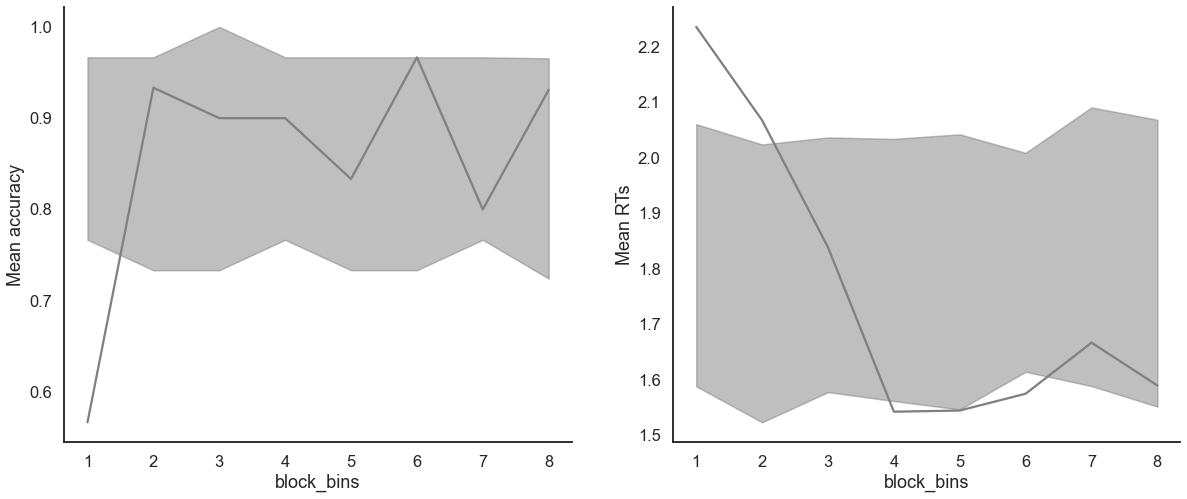

In [19]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

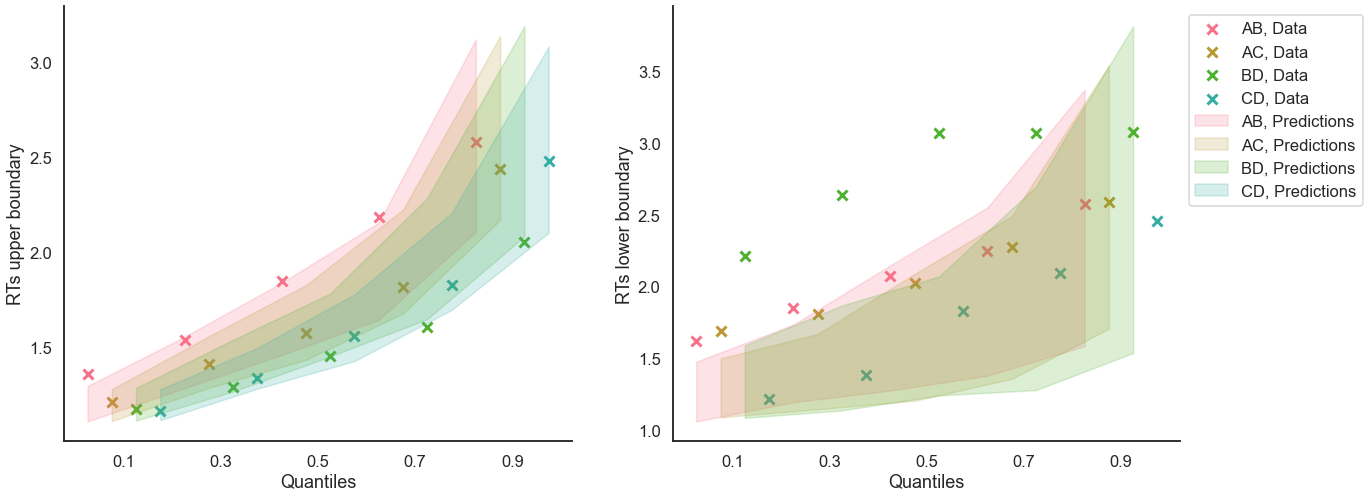

In [20]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);